In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
dataset= pd.read_csv('ad.csv',index_col= 'Unnamed: 0')

In [3]:
dataset

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
x= dataset.iloc[:,:3]

In [5]:
x

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [6]:
y= dataset.iloc[:,3:]

In [7]:
y

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [8]:
import statsmodels.api as sm

In [9]:
x1= sm.add_constant(x)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [10]:
x1

,const,TV,Radio,Newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4
...,...,...,...,...
196,1.0,38.2,3.7,13.8
197,1.0,94.2,4.9,8.1
198,1.0,177.0,9.3,6.4
199,1.0,283.6,42.0,66.2


In [11]:
abc= sm.OLS(y,x1).fit()

In [12]:
abc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           1.58e-96
Time:                        21:15:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# ASSUMPTION
# 1- Linear Relationship
# 2- No autorelation
# 3- Multivariable Normality
# 4- Homoscedasticity
# 5- No or low Multicollinearity

In [14]:
# 1- Linear relationship
# 2tests- *scatter plot   *rainbow method 

In [15]:
# *scatter plot

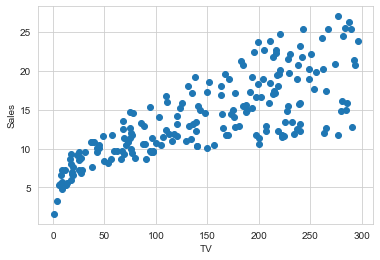

In [16]:
plt.scatter(dataset['TV'],dataset['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()                        # (this graph is linear)

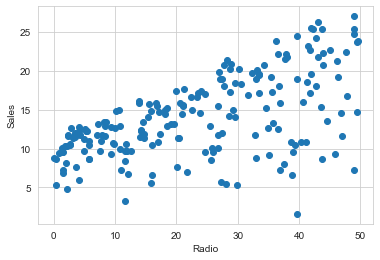

In [17]:
plt.scatter(dataset['Radio'],dataset['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()                        # (this graph is linear)

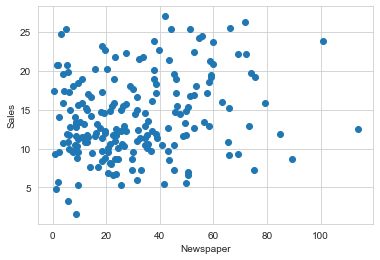

In [18]:
plt.scatter(dataset['Newspaper'],dataset['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()                        # (this graph is not linear. That means this variable is insgnificant)

In [19]:
# * rainbow method

In [20]:
sm.stats.diagnostic.linear_rainbow(res=abc)

(0.8896886584728808, 0.7185004116483391)

In [21]:
# Second value is p-value
# h0 = your data is linear
# 0.69 > 0.05
# we accept the Null Hypothesis

In [22]:
# another method is regplot

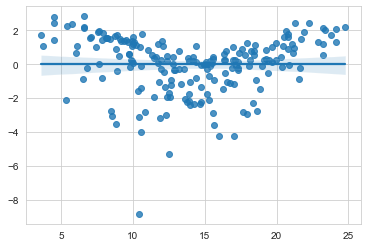

In [23]:
sns.regplot(x=abc.predict(x1),y=abc.resid)
plt.show()

In [24]:
# 2- Autocorrelation
# test- *Durbin Watson 

In [25]:
# ranges between 0-4
# 0-2 ==> positive autocorrelation
# 2 ==> no autocorrelation
# 2-4 ==> negative autocorrelation

In [26]:
# we will get the value of Durbin Watson in summary
# DW test score ===> 2.084
# means we have little autocorrelation

In [27]:
# 3- Multivariable Normality
# 2tests- *distplot   *q-q plot 

In [28]:
# *distplot (all variables [dependent and independent] should form normal distribution)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


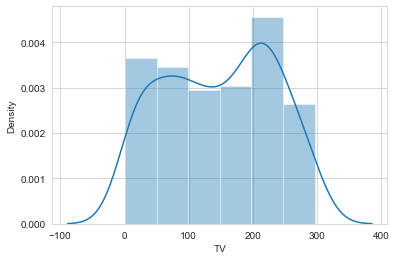

In [29]:
sns.distplot(dataset['TV'])
plt.show()     # (this variable formed normal distribution, so its a signficant variable)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


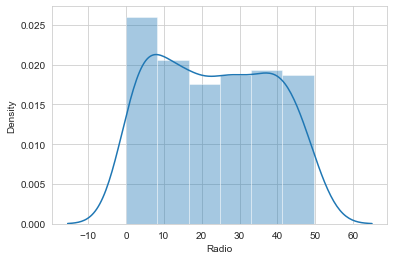

In [30]:
sns.distplot(dataset['Radio'])
plt.show()     # (this variable formed normal distribution, so its a signficant variable)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


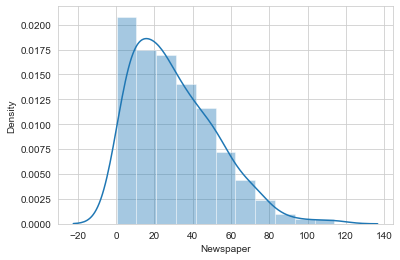

In [31]:
sns.distplot(dataset['Newspaper'])
plt.show()     # (this variable formed exponential distribution [did not normal distribution], so its a insignficant variable)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


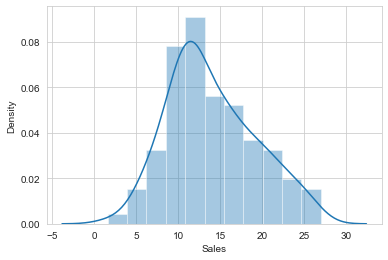

In [32]:
sns.distplot(dataset['Sales'])
plt.show()     # (this variable formed normal distribution, so its a signficant variable)

In [33]:
# *q-q plot      #(it should form an arc)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


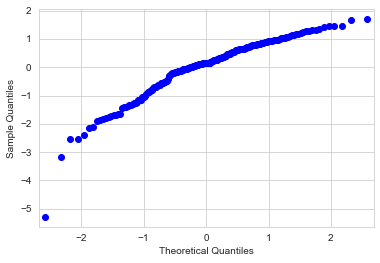

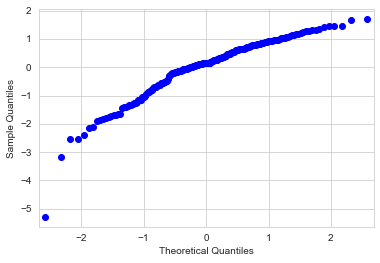

In [34]:
sm.qqplot(abc.resid,fit=True)  

In [35]:
# there are few dots up an below,it did not formed a proper arc as it has an insignifcant value['Newspaper'] as well

In [36]:
# 4- Homoscedasticity
# test- *goldfeld

In [37]:
import statsmodels.stats.api as sms

In [38]:
sms.het_goldfeldquandt(abc.resid,abc.model.exog)

(1.3516832040090754, 0.07082060666290767, 'increasing')

In [39]:
# second value is p_value
# h0 = your data is homoscedasticity
# 0.07  > 0.05
# we accept the hypothesis

In [40]:
# 5- Multicollinearity
# 2tests- *correlation coeeficient   *Variance Inflation factor [VIF]

In [41]:
# *correlation coeeficient 

In [42]:
# ranges between -1 to 1
# -1 ==> negative correlation
# 1 ==> positve correlation
# 0 ==> no correlation

In [43]:
x

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [44]:
x.corr()     #( they dont have correlation )

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


In [45]:
# *Variance Inflation factor [VIF]

In [46]:
# if VIF score is-
# near to 1 ==> no multicolinearity
# between 1 to 5 ==> moderate
# greater than 5 ==> highly corelated

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif = [variance_inflation_factor(x.values,i) for i in range(0,3)]

In [50]:
vif

[2.486771835198193, 3.2854621001628947, 3.0552445106573853]

In [ ]:
# the VF score of all three is moderate ie between 1 to 5